In [1]:
!pip uninstall -y torch torchvision torchaudio diffusers transformers accelerate xformers bitsandbytes peft datasets huggingface_hub safetensors

!pip install diffusers==0.30.0 transformers accelerate safetensors torchvision torch --upgrade
!pip install -q diffusers==0.30.0 transformers accelerate safetensors bitsandbytes datasets xformers peft
!pip -q install huggingface_hub datasets

!pip install git+https://github.com/openai/CLIP.git


# !pip install torch==2.6.0 torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121 --upgrade
# !pip install diffusers==0.30.0 transformers accelerate safetensors xformers==0.0.27.post2 bitsandbytes==0.43.3
# !pip install huggingface_hub datasets peft


Found existing installation: torch 2.9.0+cu126
Uninstalling torch-2.9.0+cu126:
  Successfully uninstalled torch-2.9.0+cu126
Found existing installation: torchvision 0.24.0+cu126
Uninstalling torchvision-0.24.0+cu126:
  Successfully uninstalled torchvision-0.24.0+cu126
Found existing installation: torchaudio 2.9.0+cu126
Uninstalling torchaudio-2.9.0+cu126:
  Successfully uninstalled torchaudio-2.9.0+cu126
Found existing installation: diffusers 0.36.0
Uninstalling diffusers-0.36.0:
  Successfully uninstalled diffusers-0.36.0
Found existing installation: transformers 4.57.3
Uninstalling transformers-4.57.3:
  Successfully uninstalled transformers-4.57.3
Found existing installation: accelerate 1.12.0
Uninstalling accelerate-1.12.0:
  Successfully uninstalled accelerate-1.12.0
Found existing installation: peft 0.18.0
Uninstalling peft-0.18.0:
  Successfully uninstalled peft-0.18.0
Found existing installation: datasets 4.0.0
Uninstalling datasets-4.0.0:
  Successfully uninstalled datasets-4.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import diffusers
import numpy as np
import random

import torch
from huggingface_hub import snapshot_download
from datasets import load_dataset, Image, Value, Features
import os



#smaller dataset
# repo_dir = snapshot_download("inmortalkaktus/pokemon-pixel-art", repo_type="dataset")
# pq = os.path.join(repo_dir, "data", "train-00000-of-00001.parquet")
# features = Features({"image": Image(), "text": Value("string")})
# ds = load_dataset("parquet", data_files=pq, features=features)["train"]

#larger dataset
repo_dir = snapshot_download("ffurfaro/PixelBytes-PokemonAll", repo_type="dataset")
pq = os.path.join(repo_dir, "data", "train-00000-of-00001.parquet")
ds = load_dataset("parquet", data_files=pq)["train"]
ds = ds.remove_columns([c for c in ds.column_names if c not in ["image", "text"]])

print(ds.column_names, len(ds))

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Fetching 3 files:   0%|          | 0/3 [00:00<?, ?it/s]

README.md:   0%|          | 0.00/437 [00:00<?, ?B/s]

data/train-00000-of-00001.parquet:   0%|          | 0.00/16.2M [00:00<?, ?B/s]

.gitattributes: 0.00B [00:00, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]

['image', 'text'] 533


In [4]:
def seed_everything(seed=2000):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

seed_everything(2000)

In [5]:
def load_model():

  MODEL_ID = "OFA-Sys/small-stable-diffusion-v0"
  device = "cuda" if torch.cuda.is_available() else "cpu"

  # load the pipeline (FP16 if GPU supports it)
  pipe = diffusers.StableDiffusionPipeline.from_pretrained(MODEL_ID, torch_dtype=torch.float16 if device=="cuda" else torch.float32)
  pipe = pipe.to(device)
  # pipe.enable_xformers_memory_efficient_attention() if hasattr(pipe, "enable_xformers_memory_efficient_attention") else None

  try:
      pipe.enable_xformers_memory_efficient_attention()
  except Exception as e:
      print("⚠️ Skipping xformers:", e)

  print("Loaded model:", MODEL_ID, "on", device)


  return pipe, device

pipe, device = load_model()

model_index.json:   0%|          | 0.00/560 [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors not found


Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

scheduler_config.json:   0%|          | 0.00/459 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/560 [00:00<?, ?B/s]

text_encoder/pytorch_model.bin:   0%|          | 0.00/492M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/836 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

safety_checker/pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/748 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/581 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/518 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.bin:   0%|          | 0.00/2.32G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.bin:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!
The config attributes {'predict_epsilon': True} were passed to DPMSolverMultistepScheduler, but are not expected and will be ignored. Please verify your scheduler_config.json configuration file.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--OFA-Sys--small-stable-diffusion-v0/snapshots/38e10e5e71e8fbf717a47a81e7543cd01c1a8140/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--OFA-Sys--small-stable-diffusion-v0/snapshots/38e10e5e71e8fbf717a47a81e7543cd01c1a8140/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--OFA-Sys--small-stable-diffusion-v0/snapshots/38e10e5e71e8fbf717a47a81e7543cd01c1a8140/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--OFA-Sys--smal

Loaded model: OFA-Sys/small-stable-diffusion-v0 on cuda


In [6]:
save_dir = "/content/pokemon/train"
os.makedirs(save_dir, exist_ok=True)

for i, sample in enumerate(ds):
    # Save image
    img = sample["image"]      # PIL.Image
    img.save(f"{save_dir}/{i:04d}.png")

    # Save caption text
    caption = sample["text"]
    with open(f"{save_dir}/{i:04d}.txt", "w") as f:
        f.write(caption)

print("Done! Saved", len(ds), "images + captions to:", save_dir)

Done! Saved 533 images + captions to: /content/pokemon/train


In [7]:
def full_rank(pipe, device):
  unet = pipe.unet

  # # 1. Enable Gradient Checkpointing
  unet.enable_gradient_checkpointing()

  # # 3. Freeze text encoder unless intentionally training
  # pipe.text_encoder.requiresgrad(False)

  # Make every parameter in the UNet trainable
  for p in unet.parameters():
      p.requires_grad = True

  unet.to(device)
  pipe.unet = unet

  # Get all trainable parameters (this will now be the full UNet)
  trainable = [p for p in unet.parameters() if p.requires_grad]
  print("✅Full Rank. Trainable params:", sum(p.numel() for p in trainable))

  return unet, trainable

unet, trainable = full_rank(pipe, device)

✅Full Rank. Trainable params: 579384964


In [8]:
import matplotlib.pyplot as plt
import torch
import clip

# --------------------------------------
# Storage for logs
# --------------------------------------
train_losses = []
val_losses = []
clip_scores = []

# --------------------------------------
# CLIP model for similarity
# --------------------------------------
clip_model, clip_preprocess = clip.load("ViT-B/32", device=device)

from torchvision.transforms.functional import to_pil_image

def compute_clip_score(imgs, texts):
    """
    imgs: tensor batch in [-1,1]
    texts: list of captions
    """

    # ---- 1. Truncate long captions for CLIP (max context length 77 tokens) ----
    # Hard truncate to ~200 chars (safe for CLIP)
    texts = [t[:200] for t in texts]

    # ---- 2. Convert tensors → PIL ----
    pil_imgs = []
    for img in imgs:
        img = (img * 0.5 + 0.5).clamp(0,1)
        pil_imgs.append(to_pil_image(img.cpu()))

    # ---- 3. Preprocess for CLIP ----
    imgs_pre = torch.stack([clip_preprocess(p) for p in pil_imgs]).to(device)

    # truncate=True prevents CLIP errors
    text_tokens = clip.tokenize(texts, truncate=True).to(device)

    with torch.no_grad():
        img_feat = clip_model.encode_image(imgs_pre)
        txt_feat = clip_model.encode_text(text_tokens)

    img_feat /= img_feat.norm(dim=-1, keepdim=True)
    txt_feat /= txt_feat.norm(dim=-1, keepdim=True)

    similarity = (img_feat * txt_feat).sum(dim=-1)
    return similarity.mean().item()


# --------------------------------------
# Validation step
# --------------------------------------
def validate(val_loader, vae, text_encoder, tokenizer, noise_scheduler):
    unet.eval()
    total_loss = 0
    count = 0

    with torch.no_grad():
        for imgs, captions in val_loader:
            imgs = imgs.to(device, dtype=torch.float16 if device=="cuda" else torch.float32)

            latents = vae.encode(imgs).latent_dist.sample() * 0.18215

            # Add noise
            noise = torch.randn_like(latents)
            timesteps = torch.randint(
                0, noise_scheduler.config.num_train_timesteps,
                (latents.shape[0],), device=device
            ).long()
            noisy_latents = noise_scheduler.add_noise(latents, noise, timesteps)

            # Text encode
            text_inputs = tokenizer(
                captions, padding="max_length", truncation=True,
                max_length=tokenizer.model_max_length,
                return_tensors="pt"
            ).to(device)

            enc = text_encoder(text_inputs.input_ids)[0]

            # Predict noise
            pred = unet(noisy_latents, timesteps, encoder_hidden_states=enc).sample
            loss = ((pred - noise) ** 2).mean()

            total_loss += loss.item()
            count += 1

    unet.train()
    return total_loss / count


# --------------------------------------
# Plotting function
# --------------------------------------
def plot_losses(train_losses, val_losses, learning_rate, weight_decay):
    epochs = range(1, len(train_losses) + 1)
    plt.figure(figsize=(8,5))
    plt.plot(epochs, train_losses, label="Train Loss")
    plt.plot(epochs, val_losses, label="Validation Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title(f"Train vs Validation Loss (lr={learning_rate}, wd={weight_decay})")
    plt.legend()
    plt.grid(True)
    plt.show()


def plot_clip_scores(clip_scores, learning_rate, weight_decay):
    epochs = range(1, len(clip_scores) + 1)
    plt.figure(figsize=(8,5))
    plt.plot(epochs, clip_scores, label="CLIP Score")
    plt.xlabel("Epoch")
    plt.ylabel("CLIP Score")
    plt.title(f"CLIP Score per Epoch (lr={learning_rate}, wd={weight_decay})")
    plt.grid(True)
    plt.show()


100%|████████████████████████████████████████| 338M/338M [00:01<00:00, 228MiB/s]


In [9]:
class Muon(torch.optim.Optimizer):
    def __init__(self, params, lr=0.02, momentum=0.95, nesterov=True,
                 weight_decay=0, backend='newtonschulz5'):
        if lr <= 0:
            raise ValueError(f"Invalid learning rate: {lr}")
        if not 0 <= momentum < 1:
            raise ValueError(f"Invalid momentum: {momentum}")
        if weight_decay < 0:
            raise ValueError(f"Invalid weight_decay: {weight_decay}")

        defaults = dict(lr=lr, momentum=momentum, nesterov=nesterov,
                       weight_decay=weight_decay)
        super().__init__(params, defaults)
        self.backend = backend

    def _orthogonalize_newton_schulz(self, G, steps=2):
        a, b, c = (3.4445, -4.7750, 2.0315)
        dtype = G.dtype
        G = G.float()
        # scale by spectral norm-ish to keep eigenvalues reasonable
        s = torch.linalg.norm(G)
        if s > 0:
            G = G / s

        for _ in range(steps):
            if G.shape[0] >= G.shape[1]:
                A = G @ G.T
                P = a*A + b*(A@A) + c*(A@A@A)
                G = P @ G
            else:
                A = G.T @ G
                P = a*A + b*(A@A) + c*(A@A@A)
                G = G @ P

        # unscale
        G = G * s
        return G.to(dtype)

    @torch.no_grad()
    def step(self, closure=None):
        loss = None
        if closure is not None:
            loss = closure()

        for group in self.param_groups:
            for p in group['params']:
                if p.grad is None:
                    continue

                g = p.grad
                state = self.state[p]

                if len(state) == 0:
                    state['momentum_buffer'] = torch.zeros_like(g)

                buf = state['momentum_buffer']
                buf.mul_(group['momentum']).add_(g)

                if group['nesterov']:
                    g = g.add(buf, alpha=group['momentum'])
                else:
                    g = buf

                if len(p.shape) == 2 and self.backend:
                    g = self._orthogonalize_newton_schulz(g)

                if group['weight_decay'] > 0:
                    g.add_(p, alpha=group['weight_decay'])

                p.add_(g, alpha=-group['lr'])

        return loss

In [12]:
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
from tqdm.auto import tqdm
import torch
from torch.optim import AdamW
import os

class SimpleDataset(Dataset):
    def __init__(self, folder):
        self.files = sorted([f for f in os.listdir(folder) if f.endswith(".png")])
        self.folder = folder
        self.transform = transforms.Compose([
            transforms.Resize((512,512), interpolation=Image.NEAREST),
            transforms.ToTensor(),
            transforms.Normalize([0.5]*3, [0.5]*3)
        ])
    def __len__(self):
        return len(self.files)
    def __getitem__(self, idx):
        img_path = os.path.join(self.folder, self.files[idx])
        txt_path = img_path.replace(".png", ".txt")

        img = Image.open(img_path).convert("RGB")
        with open(txt_path, "r") as f:
            caption = f.read().strip()
        return self.transform(img), caption


# ============================================
# LOAD BASE MODEL ONCE (outside the function)
# ============================================
pipe, device = load_model()
save_dir = "/content/pokemon/train"



def train(learning_rate, weight_decay, num_epochs=2, batch_size=4):
    unet, trainable = full_rank(pipe, device)

    dataset = SimpleDataset(save_dir)
    loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

    val_size = max(1, len(dataset) // 10)
    train_subset, val_subset = torch.utils.data.random_split(dataset, [len(dataset)-val_size, val_size])
    train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=False)

    optimizer = Muon(trainable, lr=learning_rate, momentum=0.95, weight_decay=weight_decay)
    print("Train with Muon")

    vae = pipe.vae
    noise_scheduler = pipe.scheduler
    tokenizer = pipe.tokenizer
    text_encoder = pipe.text_encoder
    unet.train()

    # Clear logs for new run
    train_losses.clear()
    val_losses.clear()
    clip_scores.clear()
    best_val = float("inf")


    for epoch in range(num_epochs):

        epoch_loss = 0.0
        batches = 0

        for imgs, captions in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
            imgs = imgs.to(device, dtype=torch.float16 if device=="cuda" else torch.float32)

            with torch.no_grad():
                latents = vae.encode(imgs).latent_dist.sample() * 0.18215

            noise = torch.randn_like(latents)
            timesteps = torch.randint(
                0, noise_scheduler.config.num_train_timesteps,
                (latents.shape[0],), device=device
            ).long()
            noisy_latents = noise_scheduler.add_noise(latents, noise, timesteps)

            text_inputs = tokenizer(
                captions,
                padding="max_length",
                max_length=tokenizer.model_max_length,
                truncation=True,
                return_tensors="pt"
            ).to(device)

            with torch.no_grad():
                encoder_hidden_states = text_encoder(text_inputs.input_ids)[0]

            pred = unet(noisy_latents, timesteps, encoder_hidden_states=encoder_hidden_states).sample
            loss = ((pred - noise) ** 2).mean()

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()
            batches += 1

        avg_train_loss = epoch_loss / batches
        train_losses.append(avg_train_loss)

        # ----- VALIDATION -----
        val_loss = validate(val_loader, vae, text_encoder, tokenizer, noise_scheduler)
        val_losses.append(val_loss)

        # ----- CLIP SCORE -----
        clip_score = compute_clip_score(*next(iter(val_loader)))
        clip_scores.append(clip_score)

        print(f"Epoch {epoch+1}: train={avg_train_loss:.4f}, val={val_loss:.4f}, clip={clip_score:.4f}")

        # Save to Google Drive with hyperparameters in filename
        # Save ONLY the best validation model
        if val_loss < best_val:
            best_val = val_loss
            torch.save(
                unet.state_dict(),
                f"/content/drive/MyDrive/Muon_Fine_Tune/unet_lr{learning_rate}_wd{weight_decay}_best.pt"
            )



    print("Training complete.")

    # ---------------------------------------------------------
    #                   PLOT RESULTS
    # ---------------------------------------------------------
    plot_losses(train_losses, val_losses, learning_rate, weight_decay)

    print("\n===== FINAL METRICS =====")
    print(f"Training Loss:    {train_losses[-1]:.4f}")
    print(f"Validation Loss:  {val_losses[-1]:.4f}")
    print(f"CLIP Score:       {clip_scores[-1]:.4f}")

    return {
        'train_loss': train_losses[-1],
        'val_loss': val_losses[-1],
        'clip_score': clip_scores[-1],
    }

vae/diffusion_pytorch_model.safetensors not found


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

The config attributes {'predict_epsilon': True} were passed to DPMSolverMultistepScheduler, but are not expected and will be ignored. Please verify your scheduler_config.json configuration file.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--OFA-Sys--small-stable-diffusion-v0/snapshots/38e10e5e71e8fbf717a47a81e7543cd01c1a8140/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--OFA-Sys--small-stable-diffusion-v0/snapshots/38e10e5e71e8fbf717a47a81e7543cd01c1a8140/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--OFA-Sys--small-stable-diffusion-v0/snapshots/38e10e5e71e8fbf717a47a81e7543cd01c1a8140/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--OFA-Sys--small-stable-diffusion-v0/snapshots/38e10e5e71e8fbf717

Loaded model: OFA-Sys/small-stable-diffusion-v0 on cuda


In [11]:
import os

print("save_dir =", save_dir)
print("Exists:", os.path.exists(save_dir))

if os.path.exists(save_dir):
    all_files = os.listdir(save_dir)
    print("Total files:", len(all_files))
    print("PNG files:", len([f for f in all_files if f.endswith('.png')]))
    print("TXT files:", len([f for f in all_files if f.endswith('.txt')]))
    print("First 10 files:", all_files[:10])


save_dir = /content/pokemon/train
Exists: True
Total files: 1066
PNG files: 533
TXT files: 533
First 10 files: ['0332.txt', '0197.png', '0529.png', '0471.png', '0191.txt', '0205.txt', '0193.txt', '0139.png', '0268.txt', '0284.txt']


RUNNINNG FOR:
Learning Rate: 1e-08
Weight Decay: 0.1
✅Full Rank. Trainable params: 579384964
Train with Muon


Epoch 1/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 1: train=0.3503, val=0.3010, clip=0.3213


Epoch 2/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 2: train=0.3463, val=0.3141, clip=0.3213


Epoch 3/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 3: train=0.3346, val=0.3553, clip=0.3213


Epoch 4/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 4: train=0.3384, val=0.2601, clip=0.3213


Epoch 5/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 5: train=0.3199, val=0.2925, clip=0.3213


Epoch 6/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 6: train=0.3497, val=0.3166, clip=0.3213


Epoch 7/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 7: train=0.3281, val=0.3398, clip=0.3213


Epoch 8/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 8: train=0.3251, val=0.2898, clip=0.3213


Epoch 9/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 9: train=0.3457, val=0.4050, clip=0.3213


Epoch 10/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 10: train=0.3425, val=0.3831, clip=0.3213
Training complete.


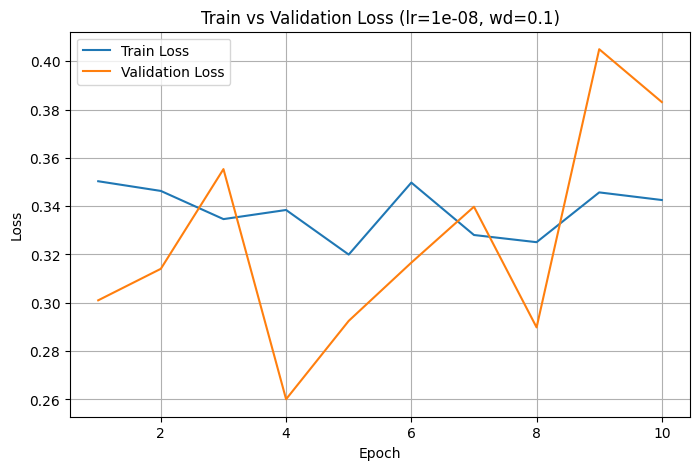


===== FINAL METRICS =====
Training Loss:    0.3425
Validation Loss:  0.3831
CLIP Score:       0.3213
--------------------------------------------------
RUNNINNG FOR:
Learning Rate: 1e-08
Weight Decay: 0.01
✅Full Rank. Trainable params: 579384964
Train with Muon


Epoch 1/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 1: train=0.3199, val=0.2675, clip=0.3228


Epoch 2/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 2: train=0.3468, val=0.4154, clip=0.3228


Epoch 3/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 3: train=0.3411, val=0.3855, clip=0.3228


Epoch 4/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 4: train=0.3347, val=0.3437, clip=0.3228


Epoch 5/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 5: train=0.3325, val=0.3307, clip=0.3228


Epoch 6/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 6: train=0.3505, val=0.3614, clip=0.3228


Epoch 7/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 7: train=0.3348, val=0.3261, clip=0.3228


Epoch 8/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 8: train=0.3370, val=0.3989, clip=0.3228


Epoch 9/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 9: train=0.3245, val=0.3237, clip=0.3228


Epoch 10/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 10: train=0.3637, val=0.3024, clip=0.3228
Training complete.


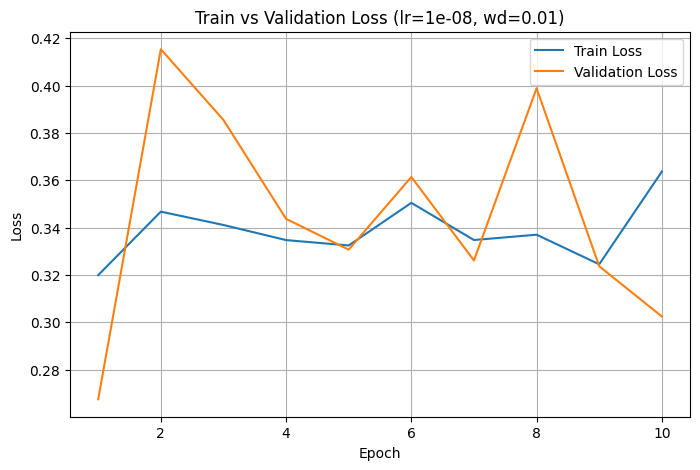


===== FINAL METRICS =====
Training Loss:    0.3637
Validation Loss:  0.3024
CLIP Score:       0.3228
--------------------------------------------------
RUNNINNG FOR:
Learning Rate: 1e-08
Weight Decay: 0.001
✅Full Rank. Trainable params: 579384964
Train with Muon


Epoch 1/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 1: train=0.3372, val=0.3833, clip=0.3420


Epoch 2/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 2: train=0.3357, val=0.2668, clip=0.3420


Epoch 3/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 3: train=0.3368, val=0.3434, clip=0.3420


Epoch 4/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 4: train=0.3264, val=0.2642, clip=0.3420


Epoch 5/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 5: train=0.3432, val=0.4129, clip=0.3420


Epoch 6/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 6: train=0.3519, val=0.3204, clip=0.3420


Epoch 7/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 7: train=0.3577, val=0.3402, clip=0.3420


Epoch 8/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 8: train=0.3330, val=0.3466, clip=0.3420


Epoch 9/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 9: train=0.3315, val=0.3157, clip=0.3420


Epoch 10/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 10: train=0.3630, val=0.3935, clip=0.3420
Training complete.


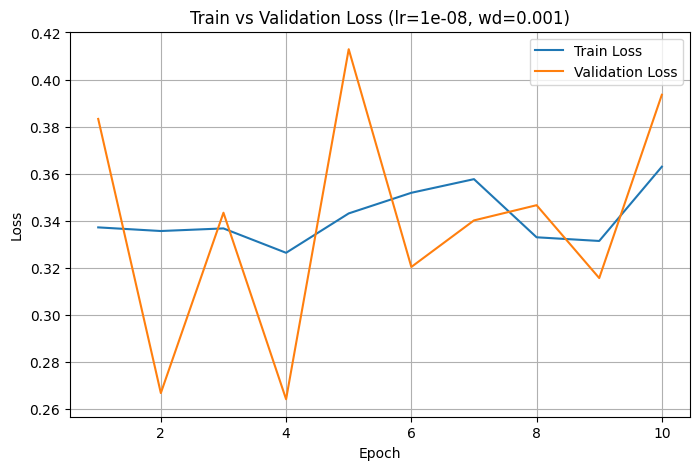


===== FINAL METRICS =====
Training Loss:    0.3630
Validation Loss:  0.3935
CLIP Score:       0.3420
--------------------------------------------------
RUNNINNG FOR:
Learning Rate: 1e-08
Weight Decay: 0.0001
✅Full Rank. Trainable params: 579384964
Train with Muon


Epoch 1/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 1: train=0.3436, val=0.3327, clip=0.3179


Epoch 2/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 2: train=0.3296, val=0.3410, clip=0.3179


Epoch 3/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 3: train=0.3476, val=0.3457, clip=0.3179


Epoch 4/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 4: train=0.3554, val=0.3012, clip=0.3179


Epoch 5/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 5: train=0.3188, val=0.3360, clip=0.3179


Epoch 6/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 6: train=0.3330, val=0.2616, clip=0.3179


Epoch 7/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 7: train=0.3600, val=0.3715, clip=0.3179


Epoch 8/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 8: train=0.3289, val=0.2728, clip=0.3179


Epoch 9/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 9: train=0.3498, val=0.3289, clip=0.3179


Epoch 10/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 10: train=0.3562, val=0.3200, clip=0.3179
Training complete.


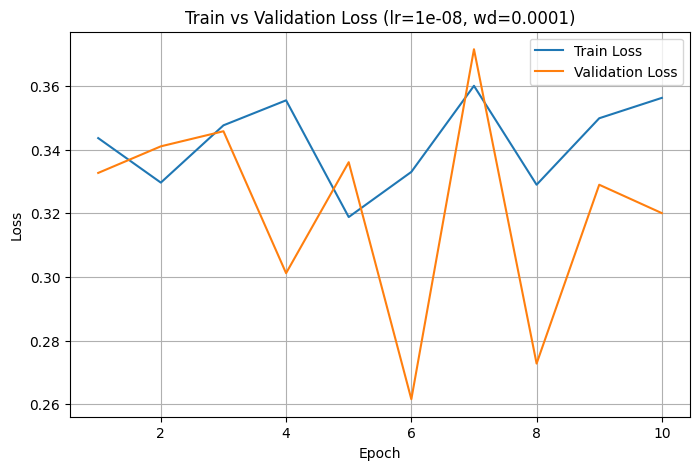


===== FINAL METRICS =====
Training Loss:    0.3562
Validation Loss:  0.3200
CLIP Score:       0.3179
--------------------------------------------------
RUNNINNG FOR:
Learning Rate: 1e-09
Weight Decay: 0.1
✅Full Rank. Trainable params: 579384964
Train with Muon


Epoch 1/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 1: train=0.3524, val=0.2890, clip=0.3289


Epoch 2/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 2: train=0.3488, val=0.3819, clip=0.3289


Epoch 3/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 3: train=0.3511, val=0.3763, clip=0.3289


Epoch 4/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 4: train=0.3255, val=0.3935, clip=0.3289


Epoch 5/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 5: train=0.3419, val=0.3952, clip=0.3289


Epoch 6/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 6: train=0.3188, val=0.3922, clip=0.3289


Epoch 7/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 7: train=0.3270, val=0.3639, clip=0.3289


Epoch 8/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 8: train=0.3458, val=0.3398, clip=0.3289


Epoch 9/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 9: train=0.3479, val=0.3591, clip=0.3289


Epoch 10/10:   0%|          | 0/120 [00:00<?, ?it/s]

In [ ]:
#The original Muon blog suggests learning rates around 0.01-0.02
lrs = [0.00000001, 0.000000001]
wds = [0.1, 0.01, 0.001, 0.0001]
INDIVIDUAL_RUN = False
EPOCHS = 10

if INDIVIDUAL_RUN:
  lrs = [1e-4]
  wds = [1e-2]

result = {}
#hyperparameter tuning
for lr in lrs:
  for wd in wds:
    print(f"RUNNINNG FOR:")
    print(f"Learning Rate: {lr}")
    print(f"Weight Decay: {wd}")
    result[(lr, wd)] = train(
        learning_rate=lr,
        weight_decay=wd,
        num_epochs=EPOCHS
    )
    print("-"*50)

RUNNINNG FOR:
Learning Rate: 1e-09
Weight Decay: 0.1
✅Full Rank. Trainable params: 579384964
Train with Muon


Epoch 1/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 1: train=0.3024, val=0.3532, clip=0.3096


Epoch 2/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 2: train=0.3527, val=0.3034, clip=0.3096


Epoch 3/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 3: train=0.3446, val=0.3125, clip=0.3096


Epoch 4/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 4: train=0.3340, val=0.3510, clip=0.3096


Epoch 5/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 5: train=0.3362, val=0.2575, clip=0.3096


Epoch 6/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 6: train=0.3215, val=0.2941, clip=0.3096


Epoch 7/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 7: train=0.3492, val=0.3149, clip=0.3096


Epoch 8/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 8: train=0.3290, val=0.3415, clip=0.3096


Epoch 9/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 9: train=0.3251, val=0.2883, clip=0.3096


Epoch 10/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 10: train=0.3454, val=0.4084, clip=0.3096
Training complete.


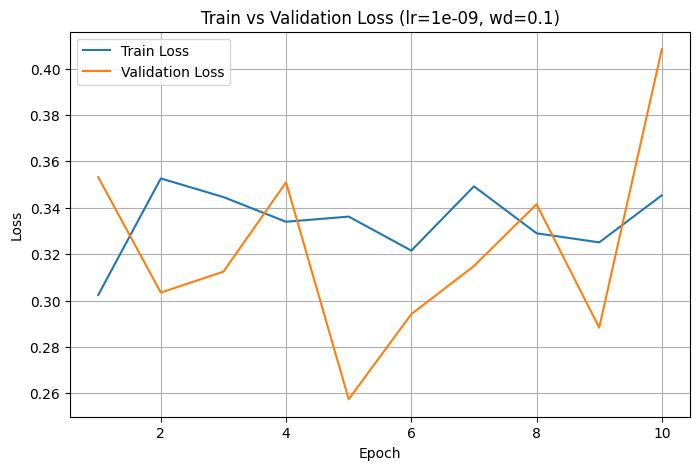


===== FINAL METRICS =====
Training Loss:    0.3454
Validation Loss:  0.4084
CLIP Score:       0.3096
--------------------------------------------------
RUNNINNG FOR:
Learning Rate: 1e-09
Weight Decay: 0.01
✅Full Rank. Trainable params: 579384964
Train with Muon


Epoch 1/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 1: train=0.3416, val=0.3738, clip=0.3140


Epoch 2/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 2: train=0.3217, val=0.2672, clip=0.3140


Epoch 3/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 3: train=0.3466, val=0.4196, clip=0.3140


Epoch 4/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 4: train=0.3439, val=0.3849, clip=0.3140


Epoch 5/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 5: train=0.3347, val=0.3408, clip=0.3140


Epoch 6/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 6: train=0.3332, val=0.3365, clip=0.3140


Epoch 7/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 7: train=0.3481, val=0.3619, clip=0.3140


Epoch 8/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 8: train=0.3346, val=0.3236, clip=0.3140


Epoch 9/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 9: train=0.3351, val=0.3936, clip=0.3140


Epoch 10/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 10: train=0.3245, val=0.3267, clip=0.3140
Training complete.


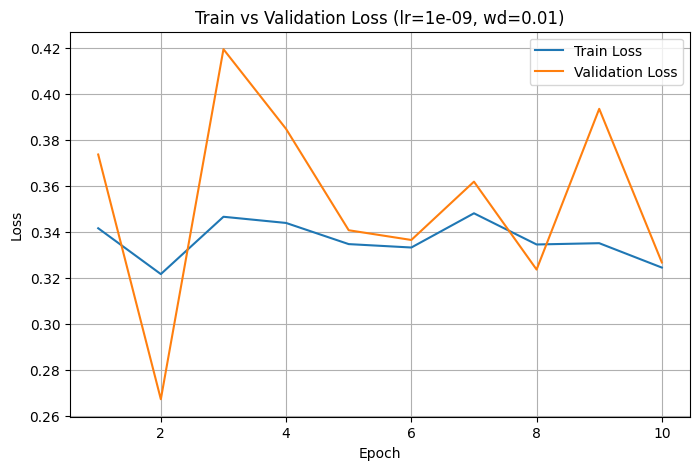


===== FINAL METRICS =====
Training Loss:    0.3245
Validation Loss:  0.3267
CLIP Score:       0.3140
--------------------------------------------------
RUNNINNG FOR:
Learning Rate: 1e-09
Weight Decay: 0.001
✅Full Rank. Trainable params: 579384964
Train with Muon


Epoch 1/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 1: train=0.3609, val=0.3071, clip=0.3330


Epoch 2/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 2: train=0.3380, val=0.3997, clip=0.3330


Epoch 3/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 3: train=0.3359, val=0.2731, clip=0.3330


Epoch 4/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 4: train=0.3355, val=0.3523, clip=0.3330


Epoch 5/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 5: train=0.3267, val=0.2643, clip=0.3330


Epoch 6/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 6: train=0.3430, val=0.4173, clip=0.3330


Epoch 7/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 7: train=0.3514, val=0.3287, clip=0.3330


Epoch 8/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 8: train=0.3557, val=0.3431, clip=0.3330


Epoch 9/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 9: train=0.3313, val=0.3597, clip=0.3330


Epoch 10/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 10: train=0.3300, val=0.3183, clip=0.3330
Training complete.


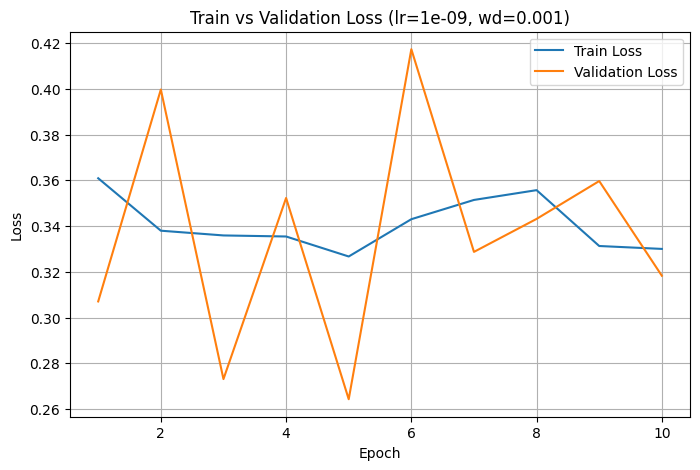


===== FINAL METRICS =====
Training Loss:    0.3300
Validation Loss:  0.3183
CLIP Score:       0.3330
--------------------------------------------------
RUNNINNG FOR:
Learning Rate: 1e-09
Weight Decay: 0.0001
✅Full Rank. Trainable params: 579384964
Train with Muon


Epoch 1/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 1: train=0.3622, val=0.3940, clip=0.3315


Epoch 2/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 2: train=0.3431, val=0.3421, clip=0.3315


Epoch 3/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 3: train=0.3297, val=0.3367, clip=0.3315


Epoch 4/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 4: train=0.3460, val=0.3430, clip=0.3315


Epoch 5/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 5: train=0.3551, val=0.3035, clip=0.3315


Epoch 6/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 6: train=0.3185, val=0.3340, clip=0.3315


Epoch 7/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 7: train=0.3359, val=0.2629, clip=0.3315


Epoch 8/10:   0%|          | 0/120 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [13]:
#The original Muon blog suggests learning rates around 0.01-0.02
lrs = [0.000000001]
wds = [0.1, 0.01, 0.001, 0.0001]
INDIVIDUAL_RUN = False
EPOCHS = 10

if INDIVIDUAL_RUN:
  lrs = [1e-4]
  wds = [1e-2]

result = {}
#hyperparameter tuning
for lr in lrs:
  for wd in wds:
    print(f"RUNNINNG FOR:")
    print(f"Learning Rate: {lr}")
    print(f"Weight Decay: {wd}")
    result[(lr, wd)] = train(
        learning_rate=lr,
        weight_decay=wd,
        num_epochs=EPOCHS
    )
    print("-"*50)

In [ ]:
#The original Muon blog suggests learning rates around 0.01-0.02
lrs = [0.000000001]
wds = [0.0001]
INDIVIDUAL_RUN = False
EPOCHS = 10

if INDIVIDUAL_RUN:
  lrs = [1e-4]
  wds = [1e-2]

result = {}
#hyperparameter tuning
for lr in lrs:
  for wd in wds:
    print(f"RUNNINNG FOR:")
    print(f"Learning Rate: {lr}")
    print(f"Weight Decay: {wd}")
    result[(lr, wd)] = train(
        learning_rate=lr,
        weight_decay=wd,
        num_epochs=EPOCHS
    )
    print("-"*50)

RUNNINNG FOR:
Learning Rate: 1e-09
Weight Decay: 0.0001
✅Full Rank. Trainable params: 579384964
Train with Muon


Epoch 1/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 1: train=0.3485, val=0.2747, clip=0.3108


Epoch 2/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 2: train=0.3353, val=0.2920, clip=0.3108


Epoch 3/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 3: train=0.3612, val=0.3639, clip=0.3108


Epoch 4/10:   0%|          | 0/120 [00:00<?, ?it/s]

In [14]:
best_combo = min(result, key=lambda k: result[k]['val_loss'])
best_combo

(1e-09, 0.001)